# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [94]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [95]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", '\n', xs)
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')       # implemented as METHODS: convenient but dangerous since it doesn't always work (depends on the particular index... spaces, dots, ecc)
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: 
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64
xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [96]:
# Extracting elements and operations: same as numpy array
# indexes are not the labels but still attached to every element you have a counter
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')       
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [97]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [98]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[:-1],'\n', s[1:])

s = s[1:] + s[:-1]
print(s)

# only the b, c, d indexes are shared

a    1.077010
b   -0.512325
c   -1.636568
d   -0.838532
e    0.474230
dtype: float64
a    1.077010
b   -0.512325
c   -1.636568
d   -0.838532
dtype: float64 
 b   -0.512325
c   -1.636568
d   -0.838532
e    0.474230
dtype: float64
a         NaN
b   -1.024650
c   -3.273135
d   -1.677064
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [99]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2025,11,26,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 26 2025'
# or alternatively
#date = '26/11/2025 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2025-11-26
2025-11-26 10:45:10.000015
Nov 26 2025
DatetimeIndex(['2025-11-26', '2025-11-27', '2025-11-28', '2025-11-29',
               '2025-11-30', '2025-12-01', '2025-12-02'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-11-26 00:00:00', '2025-11-26 00:00:01',
               '2025-11-26 00:00:02', '2025-11-26 00:00:03',
               '2025-11-26 00:00:04', '2025-11-26 00:00:05',
               '2025-11-26 00:00:06', '2025-11-26 00:00:07',
               '2025-11-26 00:00:08', '2025-11-26 00:00:09',
               ...
               '2025-11-26 00:59:50', '2025-11-26 00:59:51',
               '2025-11-26 00:59:52', '2025-11-26 00:59:53',
               '2025-11-26 00:59:54', '2025-11-26 00:59:55',
               '2025-11-26 00:59:56', '2025-11-26 00:59:57',
               '2025-11-26 00:59:58', '2025-11-26 00:59:59'],
              dtype='datetime64[ns]', length=3600, freq='s')


To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [100]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [101]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2025-11-26':'2025-12-07'], '\n') # Note - includes end time - if you go over it doesn't give anything


2025-11-26    10.537805
2025-11-27     9.902146
2025-11-28    10.165287
2025-11-29    10.160091
Freq: D, dtype: float64 

2025-11-26    10.537805
2025-11-27     9.902146
2025-11-28    10.165287
2025-11-29    10.160091
2025-11-30     9.374189
2025-12-01     8.254100
2025-12-02     8.296499
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [102]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [103]:
entries=10
dates=pd.date_range('11/26/2025 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2025-11-26 10:45:00,-0.835359,-0.607156,1.290950,-0.562054
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,-0.062298
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,0.020208
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,0.828998
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,0.010111
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,0.310866
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,-0.893219
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,0.638193
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,0.165216
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,-1.003885


or by means of a dictionary:


In [104]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# keys become the columns, values become the single values

# check what happens if D and E had different lenghts -> errors!
# but we actually already have some sort of broadcasting for A and B

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [105]:
df.head(2)

,A,B,C,D
2025-11-26 10:45:00,-0.835359,-0.607156,1.290950,-0.562054
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,-0.062298


In [106]:
df.tail(4)

,A,B,C,D
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,-0.893219
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,0.638193
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,0.165216
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,-1.003885


In [107]:
df.index

DatetimeIndex(['2025-11-26 10:45:00', '2025-11-26 11:45:00',
               '2025-11-26 12:45:00', '2025-11-26 13:45:00',
               '2025-11-26 14:45:00', '2025-11-26 15:45:00',
               '2025-11-26 16:45:00', '2025-11-26 17:45:00',
               '2025-11-26 18:45:00', '2025-11-26 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [108]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [109]:
df.values

array([[-0.83535863, -0.60715573,  1.29094968, -0.56205404],
       [-0.52842614, -0.2738409 , -0.33062935, -0.06229756],
       [ 0.91891352, -2.22123285, -0.45009516,  0.0202083 ],
       [ 0.24555019, -0.8294955 , -1.07318702,  0.82899753],
       [-0.56851076,  0.31789087, -1.1412355 ,  0.01011107],
       [ 1.26557991, -0.94147331, -0.61444849,  0.31086597],
       [ 1.24817129, -0.53861933, -0.87129925, -0.89321899],
       [-2.31461203, -0.03088614,  0.36150093,  0.63819346],
       [-1.46628222, -1.27912543,  0.72426339,  0.16521622],
       [-0.77770267, -0.34387012, -1.52767549, -1.0038849 ]])

In [110]:
df.describe()

# very useful to inspect your data!
# assuming that ever column is a variable

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.281268,-0.674781,-0.363186,-0.054786
std,1.187233,0.710647,0.896865,0.606847
min,-2.314612,-2.221233,-1.527675,-1.003885
25%,-0.820945,-0.913479,-1.022715,-0.437115
50%,-0.548468,-0.572888,-0.532272,0.015160
75%,0.750573,-0.291348,0.188468,0.274454
max,1.265580,0.317891,1.290950,0.828998


In [111]:
df.T

,2025-11-26 10:45:00,2025-11-26 11:45:00,2025-11-26 12:45:00,2025-11-26 13:45:00,2025-11-26 14:45:00,2025-11-26 15:45:00,2025-11-26 16:45:00,2025-11-26 17:45:00,2025-11-26 18:45:00,2025-11-26 19:45:00
A,-0.835359,-0.528426,0.918914,0.245550,-0.568511,1.265580,1.248171,-2.314612,-1.466282,-0.777703
B,-0.607156,-0.273841,-2.221233,-0.829495,0.317891,-0.941473,-0.538619,-0.030886,-1.279125,-0.343870
C,1.290950,-0.330629,-0.450095,-1.073187,-1.141236,-0.614448,-0.871299,0.361501,0.724263,-1.527675
D,-0.562054,-0.062298,0.020208,0.828998,0.010111,0.310866,-0.893219,0.638193,0.165216,-1.003885


In [112]:
df.sort_index(axis=0,ascending=False)


,A,B,C,D
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,-1.003885
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,0.165216
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,0.638193
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,-0.893219
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,0.310866
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,0.010111
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,0.828998
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,0.020208
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,-0.062298
2025-11-26 10:45:00,-0.835359,-0.607156,1.290950,-0.562054


In [113]:
df.sort_values(by="C")
# all the others are sorting accordingly

,A,B,C,D
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,-1.003885
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,0.010111
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,0.828998
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,-0.893219
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,0.310866
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,0.020208
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,-0.062298
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,0.638193
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,0.165216
2025-11-26 10:45:00,-0.835359,-0.607156,1.290950,-0.562054


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [114]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2025-11-26 10:45:00   -0.835359
2025-11-26 11:45:00   -0.528426
2025-11-26 12:45:00    0.918914
2025-11-26 13:45:00    0.245550
2025-11-26 14:45:00   -0.568511
2025-11-26 15:45:00    1.265580
2025-11-26 16:45:00    1.248171
2025-11-26 17:45:00   -2.314612
2025-11-26 18:45:00   -1.466282
2025-11-26 19:45:00   -0.777703
Freq: h, Name: A, dtype: float64 

2025-11-26 10:45:00   -0.835359
2025-11-26 11:45:00   -0.528426
2025-11-26 12:45:00    0.918914
2025-11-26 13:45:00    0.245550
2025-11-26 14:45:00   -0.568511
2025-11-26 15:45:00    1.265580
2025-11-26 16:45:00    1.248171
2025-11-26 17:45:00   -2.314612
2025-11-26 18:45:00   -1.466282
2025-11-26 19:45:00   -0.777703
Freq: h, Name: A, dtype: float64


In [115]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2025-11-26 10:45:00":"2025-11-26 12:45:00"])

                            A         B         C         D
2025-11-26 10:45:00 -0.835359 -0.607156  1.290950 -0.562054
2025-11-26 11:45:00 -0.528426 -0.273841 -0.330629 -0.062298
2025-11-26 12:45:00  0.918914 -2.221233 -0.450095  0.020208
                            A         B         C         D
2025-11-26 10:45:00 -0.835359 -0.607156  1.290950 -0.562054
2025-11-26 11:45:00 -0.528426 -0.273841 -0.330629 -0.062298
2025-11-26 12:45:00  0.918914 -2.221233 -0.450095  0.020208


### Selection by label

In [116]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

# selection of the first row

A   -0.835359
B   -0.607156
C    1.290950
D   -0.562054
Name: 2025-11-26 10:45:00, dtype: float64

In [117]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]         # selecting the whole column for a certain variable
#a=df.loc[:,['A','B']]

,A,B
2025-11-26 10:45:00,-0.835359,-0.607156
2025-11-26 11:45:00,-0.528426,-0.273841
2025-11-26 12:45:00,0.918914,-2.221233
2025-11-26 13:45:00,0.245550,-0.829495
2025-11-26 14:45:00,-0.568511,0.317891
2025-11-26 15:45:00,1.265580,-0.941473
2025-11-26 16:45:00,1.248171,-0.538619
2025-11-26 17:45:00,-2.314612,-0.030886
2025-11-26 18:45:00,-1.466282,-1.279125
2025-11-26 19:45:00,-0.777703,-0.343870


In [118]:
# showing label slicing, both endpoints are included:
df.loc['2025-11-26 14:45:00':'2025-11-26 16:45:00', ['A','B']]

,A,B
2025-11-26 14:45:00,-0.568511,0.317891
2025-11-26 15:45:00,1.265580,-0.941473
2025-11-26 16:45:00,1.248171,-0.538619


In [119]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.5284261352539349
-0.5284261352539349


### Selecting by position

In [120]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,2:4])                    # [ROW, COLUMN]

A    0.245550
B   -0.829495
C   -1.073187
D    0.828998
Name: 2025-11-26 13:45:00, dtype: float64 

                            C         D
2025-11-26 13:45:00 -1.073187  0.828998
2025-11-26 14:45:00 -1.141236  0.010111


In [121]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2025-11-26 11:45:00,-0.528426,-0.330629
2025-11-26 12:45:00,0.918914,-0.450095
2025-11-26 14:45:00,-0.568511,-1.141236


In [122]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2025-11-26 11:45:00 -0.528426 -0.273841 -0.330629 -0.062298
2025-11-26 12:45:00  0.918914 -2.221233 -0.450095  0.020208 

                            B         C
2025-11-26 10:45:00 -0.607156  1.290950
2025-11-26 11:45:00 -0.273841 -0.330629
2025-11-26 12:45:00 -2.221233 -0.450095
2025-11-26 13:45:00 -0.829495 -1.073187
2025-11-26 14:45:00  0.317891 -1.141236
2025-11-26 15:45:00 -0.941473 -0.614448
2025-11-26 16:45:00 -0.538619 -0.871299
2025-11-26 17:45:00 -0.030886  0.361501
2025-11-26 18:45:00 -1.279125  0.724263
2025-11-26 19:45:00 -0.343870 -1.527675
-0.27384090269579475


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [123]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

# this is effectively a MASK
# much more efficient than writing down a for loop and having your whole data run through. 
# This applies a mask on a column and is way better

,A,B,C,D
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,0.010111


In [124]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2025-11-26 10:45:00,NaN,NaN,1.290950,NaN
2025-11-26 11:45:00,NaN,NaN,NaN,NaN
2025-11-26 12:45:00,0.918914,NaN,NaN,0.020208
2025-11-26 13:45:00,0.245550,NaN,NaN,0.828998
2025-11-26 14:45:00,NaN,0.317891,NaN,0.010111
2025-11-26 15:45:00,1.265580,NaN,NaN,0.310866
2025-11-26 16:45:00,1.248171,NaN,NaN,NaN
2025-11-26 17:45:00,NaN,NaN,0.361501,0.638193
2025-11-26 18:45:00,NaN,NaN,0.724263,0.165216
2025-11-26 19:45:00,NaN,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [125]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,2
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,4
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,6
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,8
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,16
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18


In [126]:
# defining a new column by operating with a function on the dataframe itself,
# always working by COLUMN

def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18,0.996917


In [127]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,-1.290950,-5.0,0.0,0,-1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,-5.0,-0.5,-2,-0.999962
2025-11-26 12:45:00,-0.918914,-2.221233,-0.450095,-5.0,-1.0,-4,-0.999848
2025-11-26 13:45:00,-0.245550,-0.829495,-1.073187,-5.0,-1.5,-6,-0.999657
2025-11-26 14:45:00,-0.568511,-0.317891,-1.141236,-5.0,-2.0,-8,-0.999391
2025-11-26 15:45:00,-1.265580,-0.941473,-0.614448,-5.0,-2.5,-10,-0.999048
2025-11-26 16:45:00,-1.248171,-0.538619,-0.871299,-5.0,-3.0,-12,-0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,-0.361501,-5.0,-3.5,-14,-0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,-0.724263,-5.0,-4.0,-16,-0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [128]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `dfd["a"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [129]:
dfd["a"][dfd["b"] > 5] = 100
dfd

C:\Users\nickt\AppData\Local\Temp\ipykernel_1396\449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [130]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [131]:
# Dropping by column
df.drop(['E prime'], axis=1)
df
print(df, '\n')

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

                            A         B         C    D    E  E prime    cosine
2025-11-26 10:45:00  0.000000 -0.607156  1.290950  5.0  0.0        0  1.000000
2025-11-26 11:45:00 -0.528426 -0.273841 -0.330629  5.0  0.5        2  0.999962
2025-11-26 12:45:00  0.918914 -2.221233 -0.450095  5.0  1.0        4  0.999848
2025-11-26 13:45:00  0.245550 -0.829495 -1.073187  5.0  1.5        6  0.999657
2025-11-26 14:45:00 -0.568511  0.317891 -1.141236  5.0  2.0        8  0.999391
2025-11-26 15:45:00  1.265580 -0.941473 -0.614448  5.0  2.5       10  0.999048
2025-11-26 16:45:00  1.248171 -0.538619 -0.871299  5.0  3.0       12  0.998630
2025-11-26 17:45:00 -2.314612 -0.030886  0.361501  5.0  3.5       14  0.998135
2025-11-26 18:45:00 -1.466282 -1.279125  0.724263  5.0  4.0       16  0.997564
2025-11-26 19:45:00 -0.777703 -0.343870 -1.527675  5.0  4.5       18  0.996917 



,A,B,C,D,E,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,0.999962
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,0.999848
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,0.999657
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,0.999391
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,0.996917


In [132]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18,0.996917


In [133]:
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18,0.996917


In [134]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2025-11-26 18:45:00"))

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [135]:
df_wNan = df[df>-0.5]
df_wNan

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,NaN,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,NaN,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,NaN,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,NaN,NaN,5.0,1.5,6,0.999657
2025-11-26 14:45:00,NaN,0.317891,NaN,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,NaN,NaN,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,NaN,NaN,5.0,3.0,12,0.998630
2025-11-26 17:45:00,NaN,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,NaN,NaN,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,NaN,-0.343870,NaN,5.0,4.5,18,0.996917


In [136]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [137]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,False,True,False,False,False,False,False
2025-11-26 11:45:00,True,False,False,False,False,False,False
2025-11-26 12:45:00,False,True,False,False,False,False,False
2025-11-26 13:45:00,False,True,True,False,False,False,False
2025-11-26 14:45:00,True,False,True,False,False,False,False
2025-11-26 15:45:00,False,True,True,False,False,False,False
2025-11-26 16:45:00,False,True,True,False,False,False,False
2025-11-26 17:45:00,True,False,False,False,False,False,False
2025-11-26 18:45:00,True,True,False,False,False,False,False
2025-11-26 19:45:00,True,False,True,False,False,False,False


In [138]:
# filling missing data
# pretty dangerous, to be done only if you know exactly what you're doing with the data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,0.000000,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,0.000000,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,0.000000,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,0.000000,0.000000,5.0,1.5,6,0.999657
2025-11-26 14:45:00,0.000000,0.317891,0.000000,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,0.000000,0.000000,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,0.000000,0.000000,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.000000,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,0.000000,0.000000,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.000000,-0.343870,0.000000,5.0,4.5,18,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [139]:
df_wNan.fillna(method='pad')

# guessing the actual missing measurements

C:\Users\nickt\AppData\Local\Temp\ipykernel_1396\2733574853.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,NaN,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,0.000000,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,-0.273841,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,-0.273841,-0.450095,5.0,1.5,6,0.999657
2025-11-26 14:45:00,0.245550,0.317891,-0.450095,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,0.317891,-0.450095,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,0.317891,-0.450095,5.0,3.0,12,0.998630
2025-11-26 17:45:00,1.248171,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,1.248171,-0.030886,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,1.248171,-0.343870,0.724263,5.0,4.5,18,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [140]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.197732
B         -0.674781
C         -0.363186
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2025-11-26 10:45:00    0.954828
2025-11-26 11:45:00    1.052438
2025-11-26 12:45:00    1.321062
2025-11-26 13:45:00    1.691789
2025-11-26 14:45:00    2.086791
2025-11-26 15:45:00    2.601244
2025-11-26 16:45:00    2.976697
2025-11-26 17:45:00    3.073448
2025-11-26 18:45:00    3.425203
2025-11-26 19:45:00    3.692524
Freq: h, dtype: float64 



In [141]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-0.528426,-0.880997,0.960320,10.0,0.5,2,1.999962
2025-11-26 12:45:00,0.390487,-3.102229,0.510225,15.0,1.5,6,2.999810
2025-11-26 13:45:00,0.636038,-3.931725,-0.562962,20.0,3.0,12,3.999467
2025-11-26 14:45:00,0.067527,-3.613834,-1.704197,25.0,5.0,20,4.998858
2025-11-26 15:45:00,1.333107,-4.555307,-2.318646,30.0,7.5,30,5.997906
2025-11-26 16:45:00,2.581278,-5.093927,-3.189945,35.0,10.5,42,6.996536
2025-11-26 17:45:00,0.266666,-5.124813,-2.828444,40.0,14.0,56,7.994670
2025-11-26 18:45:00,-1.199616,-6.403938,-2.104181,45.0,18.0,72,8.992234
2025-11-26 19:45:00,-1.977319,-6.747808,-3.631856,50.0,22.5,90,9.989152


In [142]:
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.607156,1.290950,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-0.528426,-0.273841,-0.330629,5.0,0.5,2,0.999962
2025-11-26 12:45:00,0.918914,-2.221233,-0.450095,5.0,1.0,4,0.999848
2025-11-26 13:45:00,0.245550,-0.829495,-1.073187,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.568511,0.317891,-1.141236,5.0,2.0,8,0.999391
2025-11-26 15:45:00,1.265580,-0.941473,-0.614448,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.248171,-0.538619,-0.871299,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-2.314612,-0.030886,0.361501,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-1.466282,-1.279125,0.724263,5.0,4.0,16,0.997564
2025-11-26 19:45:00,-0.777703,-0.343870,-1.527675,5.0,4.5,18,0.996917


In [143]:
df.apply(lambda x: x.max() - x.min())

A           3.580192
B           2.539124
C           2.818625
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [144]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2025-11-26 10:45:00   -0.607156
2025-11-26 11:45:00   -0.802267
2025-11-26 12:45:00   -1.302319
2025-11-26 13:45:00   -0.583945
2025-11-26 14:45:00   -0.250620
2025-11-26 15:45:00    0.324107
2025-11-26 16:45:00    0.709552
2025-11-26 17:45:00   -2.345498
2025-11-26 18:45:00   -2.745408
2025-11-26 19:45:00   -1.121573
Freq: h, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [145]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nickt/data/data_000637.txt'

Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.206810,0.201100,0.205996,0.161946
1,0.255376,-1.789968,0.718607,-1.092955
2,0.599764,0.305079,0.293302,0.366284
3,-0.473219,1.473581,0.027859,1.113158
4,0.503735,-0.132819,-0.491346,1.385315
5,-0.710256,0.488164,-0.414207,0.907611
6,0.358442,0.213271,0.207444,-0.722258
7,0.032071,0.029263,0.792068,1.108043
8,-1.505228,-0.051844,1.488040,-0.049629
9,0.848844,-0.812598,0.386877,-1.479852


In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.206810  0.201100  0.205996  0.161946
 1  0.255376 -1.789968  0.718607 -1.092955
 2  0.599764  0.305079  0.293302  0.366284,
           0         1         2         3
 3 -0.473219  1.473581  0.027859  1.113158
 4  0.503735 -0.132819 -0.491346  1.385315
 5 -0.710256  0.488164 -0.414207  0.907611
 6  0.358442  0.213271  0.207444 -0.722258,
           0         1         2         3
 7  0.032071  0.029263  0.792068  1.108043
 8 -1.505228 -0.051844  1.488040 -0.049629
 9  0.848844 -0.812598  0.386877 -1.479852]

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.206810,0.201100,0.205996,0.161946
1,0.255376,-1.789968,0.718607,-1.092955
2,0.599764,0.305079,0.293302,0.366284
3,-0.473219,1.473581,0.027859,1.113158
4,0.503735,-0.132819,-0.491346,1.385315
5,-0.710256,0.488164,-0.414207,0.907611
6,0.358442,0.213271,0.207444,-0.722258
7,0.032071,0.029263,0.792068,1.108043
8,-1.505228,-0.051844,1.488040,-0.049629
9,0.848844,-0.812598,0.386877,-1.479852


In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-0.206810,0.201100,0.205996,0.161946
1,0.255376,-1.789968,0.718607,-1.092955
2,0.599764,0.305079,0.293302,0.366284
3,-0.473219,1.473581,0.027859,1.113158
4,0.503735,-0.132819,-0.491346,1.385315
5,-0.710256,0.488164,-0.414207,0.907611
6,0.358442,0.213271,0.207444,-0.722258
7,0.032071,0.029263,0.792068,1.108043
8,-1.505228,-0.051844,1.488040,-0.049629
9,0.848844,-0.812598,0.386877,-1.479852


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [ ]:
import pandas as pd

# these are typical operations that you perform on databases

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [ ]:
result = pd.merge(df2, df1, on='id', how='left')
print(result)

   id  age     name
0   2   25      Bob
1   3   30  Charlie
2   4   35      NaN


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [ ]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [ ]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [146]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [147]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [ ]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)

# MULTI-INDEX 

               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [151]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [152]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [153]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          30   20      2
B          70   40      2
C         110   60      2


C:\Users\nickt\AppData\Local\Temp\ipykernel_1396\640594234.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Category').apply(custom_aggregation)


In [ ]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


NameError: name 'df' is not defined

## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)

# think of this as essentially additional dimensions to your 'tensor'
# HIERARCHICAL!

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -1.056345
       two       0.021480
baz    one      -0.707150
       two      -1.392094
foo    one       0.356541
       two      -0.407025
qux    one       0.229429
       two      -1.061924
dtype: float64


In [156]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.830074 -0.467817
    three  0.192811 -1.761440
    two   -0.064109 -0.239663
foo one    1.144759  0.186681
    three -2.054710 -3.261997
    two    1.320062  0.432216

In [157]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.830074
            D   -0.467817
     three  C    0.192811
            D   -1.761440
     two    C   -0.064109
            D   -0.239663
foo  one    C    1.144759
            D    0.186681
     three  C   -2.054710
            D   -3.261997
     two    C    1.320062
            D    0.432216
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

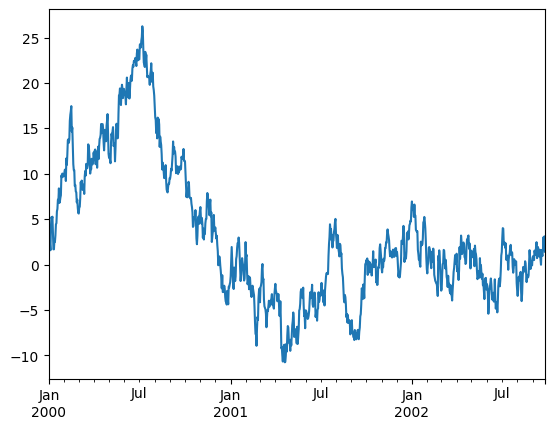

In [149]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

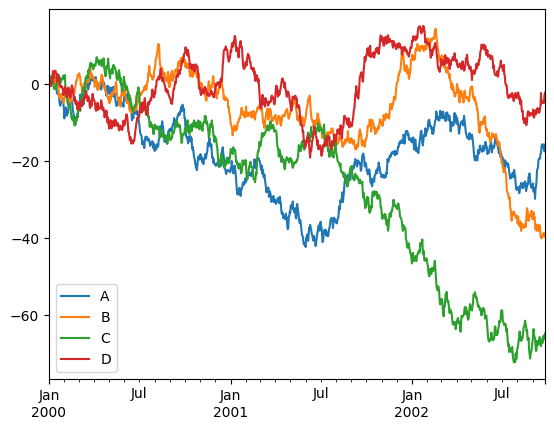

In [158]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')